In [ ]:
import http.client
from bs4 import BeautifulSoup
import csv

conn = http.client.HTTPSConnection("laptop.pmyp.gov.pk")

headersList = {
 "Accept": "*/*",
 "User-Agent": "Thunder Client (https://www.thunderclient.com)",
 "Content-Type": "multipart/form-data; boundary=kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A"
}

def post(payload):
    conn.request("POST", "/includes/ajax_functions.php", payload, headersList)
    response = conn.getresponse()
    result = response.read()
    return result

def mapFromSoupWithZero(soup, element):
    uni  = soup.find_all(element)
    mapped = {}
    for i in uni:
        if i['value'] != '':
            mapped[i['value']] = i.text.strip()
    return mapped

def mapFromSoupWithoutZero(soup, element):
    uni  = soup.find_all(element)
    mapped = {}
    for i in uni:
        if i['value'] != '0' and i['value'] != '':
            mapped[i['value']] = i.text.strip()
    return mapped

def getUni(city):
    payload = "--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"city_id\"\r\n\r\n" + str(city) + "\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A--\r\n"
    result = post(payload)
    soup = BeautifulSoup(result, 'html.parser')
    return mapFromSoupWithoutZero(soup, 'option')

def getCampus(uni):
    payload = "--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"university_for_campus\"\r\n\r\n"+str(uni)+"\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"scheme_id1\"\r\n\r\n6\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A--\r\n"
    result = post(payload)
    soup = BeautifulSoup(result, 'html.parser')
    return mapFromSoupWithZero(soup, 'option')

def getDegreePrograms(uni, campus):
    payload = "--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"university_dept\"\r\n\r\n"+str(uni)+"\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"campus\"\r\n\r\n"+str(campus)+"\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"scheme_id1\"\r\n\r\n6\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A--\r\n"
    result = post(payload)
    soup = BeautifulSoup(result, 'html.parser')
    return mapFromSoupWithZero(soup, 'option')

def getDegreeLevels():
    return {'1': 'PhD','2': '18 years education','3': '16 years education'}

def getYearsOfStudy():
    return [1,2,3,4,5]

def getStudents(city_name,uni_name,campus_name,degree_name,degree_level_name,city, uni, campus, degree, degree_level, years):
    payload = "--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"phase\"\r\n\r\n6\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"city\"\r\n\r\n"+str(city)+"\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"university\"\r\n\r\n"+str(uni)+"\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"campus\"\r\n\r\n"+str(campus)+"\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"school_dept\"\r\n\r\n"+str(degree)+"\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"degree_level\"\r\n\r\n"+str(degree_level)+"\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"year_of_study\"\r\n\r\n"+str(years)+"\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"filter\"\r\n\r\n1\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A\r\nContent-Disposition: form-data; name=\"Submit\"\r\n\r\nFilter Result\r\n--kljmyvW1ndjXaOEAg4vPm6RBUqO6MC5A--\r\n"

    conn.request("POST", "/student_details.php", payload, headersList)
    response = conn.getresponse()
    result = response.read()
    soup = BeautifulSoup(result, 'html.parser')
    table = soup.select_one("table#example")

    # Extract the table headers and rows
    # headers = [th.text for th in table.find_all('th')]
    rows = []
    for tr in table.find_all('tr'):
        row = [td.text.strip() for td in tr.find_all('td')]
        if row:
            row.append(city_name)
            row.append(uni_name)
            row.append(campus_name)
            row.append(degree_name)
            row.append(degree_level_name)
            row.append(years)
            rows.append(row)
    # Write the table to a CSV file
    return rows

def getCities():
    return {
    'hyderabad': '122',
    'mianwali': '127',
    'murree': '123',
    'narowal': '126',
    'shikarpur': '121',
    'abbottabad': '26',
    'bagh': '8',
    'bahawalpur': '29',
    'bannu': '22',
    'bhakkar': '131',
    'bhitshah': '120',
    'buner': '125',
    'chakdara malakand': '20',
    'chakwal': '118',
    'charsadda': '15',
    'chitral': '130',
    'd.i.khan': '16',
    'dera ghazi khan': '45',
    'dodhial mansehra': '17',
    'faisalabad': '30',
    'fata': '48',
    'gilgit': '13',
    'gujrat': '5',
    'gwadar': '115',
    'haripur': '24',
    'islamabad': '2',
    'jamshoro': '33',
    'jhang': '119',
    'karachi': '4',
    'karak': '40',
    'khairpur': '35',
    'khuzdar': '11',
    'kohat': '18',
    'kotli': '42',
    'lahore': '3',
    'lakki marwat': '116',
    'larkana': '36',
    'lasbela': '12',
    'loralai': '46',
    'mandi bahauddin': '128',
    'mardan': '129',
    'mirpur': '7',
    'multan': '28',
    'muzaffarabad': '9',
    'nawabshah': '34',
    'nowshera': '95',
    'okara': '117',
    'peshawar': '39',
    'quetta': '6',
    'rahim yar khan': '43',
    'rawalakot': '10',
    'rawalpindi': '1',
    'sahiwal': '124',
    'sakrand': '47',
    'sargodha': '32',
    'sheringal - dir': '19',
    'sialkot': '44',
    'sibi': '114',
    'skardu': '113',
    'sukkur': '38',
    'swabi': '25',
    'swat': '23',
    'tandojam': '37',
    'taxila': '31',
    'turbat': '41'
}
def createFile():
  cols = ['Name of Stundent', 'Father Name', 'Enrollment No', 'Degree Program', 'Year of Study', 'Semester', 'Last Exam CGPA', 'Percentage', 'Status', 'Merit Status', 'City', 'University', 'Campus', 'Degree Name', 'Degree Level', 'Years']
  with open('/content/drive/MyDrive/Laptop_Data/scrape_data.csv', 'a', newline='') as f:
          writer = csv.writer(f)
          writer.writerow(cols)

In [ ]:
count = 0
createFile()

for city,city_value in getCities().items():
    for uni_value, uni in getUni(city_value).items():
        for campus_value, campus in getCampus(uni_value).items():
            rows = []
            for degree_value, degree in getDegreePrograms(uni_value, campus_value).items():
                for degree_level_value, degree_level in getDegreeLevels().items():
                    for years in getYearsOfStudy():
                        r = getStudents(city_name=city,uni_name=uni,campus_name=campus,degree_name=degree,degree_level_name=degree_level,city=city_value,uni=uni_value,campus=campus_value,degree=degree_value,degree_level=degree_level_value,years=years)
                        rows = rows + r
                        count= count+1
                        print(count)
            with open('/content/drive/MyDrive/Laptop_Data/scrape_data.csv', 'a', newline='') as f:
                  writer = csv.writer(f)
                  writer.writerows(rows)

In [ ]:
U = getUni("3")
len(U)

15

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Laptop_Data/scrape_data.csv')

<ipython-input-1-060d77285bd0>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Laptop_Data/scrape_data.csv')


In [ ]:
clone = df[:]

In [ ]:
clone.loc[clone['Enrollment No'] == '2020-CS-114']

,Name of Stundent,Father Name,Enrollment No,Degree Program,Year of Study,Semester,Last Exam CGPA,Percentage,Status,Merit Status,City,University,Campus,Degree Name,Degree Level,Years
488758,Sooban Ali Rafiquie,Muhammad Iqbal,2020-CS-114,BS (Hons),3,5,2.887,70.0,Verified,NaN,multan,Muhammad Nawaz Sharif University of Engineeri...,Main campus,Computer Science,16 years education,3


In [ ]:
clone.loc[clone['City'] == "lahore"]

,Name of Stundent,Father Name,Enrollment No,Degree Program,Year of Study,Semester,Last Exam CGPA,Percentage,Status,Merit Status,City,University,Campus,Degree Name,Degree Level,Years
345316,Sarah Faisal,Faisal Niaz,2022-FJMU-0128,PhD (5 years),1,0,3.73,93.00,Disapproved,NaN,lahore,Fatima Jinnah Medical University,Main campus,"Basic & Clinical Sciences,Medicine & Allied, S...",PhD,1
345317,Kashmala Chaudhry,Nadeem Ud Din,-,PhD (5 years),1,1,3.69,92.00,Disapproved,NaN,lahore,Fatima Jinnah Medical University,Main campus,"Basic & Clinical Sciences,Medicine & Allied, S...",PhD,1
345318,MUHAMMAD SAJJAD,MUHAMMAD RAFIQUE,MD/2021-FJMU-1015,PhD (5 years),2,0,2.83,68.73,Verified,NaN,lahore,Fatima Jinnah Medical University,Main campus,"Basic & Clinical Sciences,Medicine & Allied, S...",PhD,2
345319,Noman Majeed,Abdul Majeed,754,PhD (5 years),2,3,2.52,60.40,Disapproved,NaN,lahore,Fatima Jinnah Medical University,Main campus,"Basic & Clinical Sciences,Medicine & Allied, S...",PhD,2
345320,Muhammad Ali,Sardar Allah Ditta Baitoo,MD-2021-FJMU-1013,PhD (5 years),2,0,2.21,52.00,Verified,NaN,lahore,Fatima Jinnah Medical University,Main campus,"Basic & Clinical Sciences,Medicine & Allied, S...",PhD,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438204,Abdul Wahab Mazhar,Mazhar Hussain,2018-VA-120,DVM,5,10,3.10,76.00,Verified,NaN,lahore,University of Veterinary & Animal Sciences,Narowal Campus,Veterinary Medicine,16 years education,5
438205,Shamreza Aziz ur Rehman,Aziz ur Rehman,2018-DVMN-011,DVM,5,10,3.09,76.00,Verified,NaN,lahore,University of Veterinary & Animal Sciences,Narowal Campus,Veterinary Medicine,16 years education,5
438206,Hanzla Noor Muhammad,Noor Muhammad,2017-VA-712,DVM,5,10,2.95,72.00,Verified,NaN,lahore,University of Veterinary & Animal Sciences,Narowal Campus,Veterinary Medicine,16 years education,5
438207,KHABAIB ANEES,ANEES UR REHMAN,2018-DVMN-004,DVM,5,10,2.94,72.00,Verified,NaN,lahore,University of Veterinary & Animal Sciences,Narowal Campus,Veterinary Medicine,16 years education,5


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()  # seaborn's method to set its chart style

In [ ]:
x= clone.loc[clone['Status']=="Verified"]
x

,Name of Stundent,Father Name,Enrollment No,Degree Program,Year of Study,Semester,Last Exam CGPA,Percentage,Status,Merit Status,City,University,Campus,Degree Name,Degree Level,Years
0,Sunny,Washu Mal,BSBOT-2023-007,BS (Hons),1,1,3.54,87.81,Verified,NaN,hyderabad,Government College University,Main campus,Botany,16 years education,1
7,Teeha Arif,Muhammad Arif,BSBOT-2023-031,BS (Hons),1,1,3.24,79.81,Verified,NaN,hyderabad,Government College University,Main campus,Botany,16 years education,1
8,Jadesh,Chetan,BSBOT-2023-047,BS (Hons),1,1,3.18,78.18,Verified,NaN,hyderabad,Government College University,Main campus,Botany,16 years education,1
10,Wajiha khan,Imran Ali khan,BSBOT-2023-046,BS (Hons),1,1,3.15,77.36,Verified,NaN,hyderabad,Government College University,Main campus,Botany,16 years education,1
11,Ramsha Anmol,Naeemuddin,BSBOT-2023-045,BS (Hons),1,1,3.13,76.89,Verified,NaN,hyderabad,Government College University,Main campus,Botany,16 years education,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649364,Mulok Jan,Abid Ali,1106813,BS (Hons),3,5,3.11,76.33,Verified,NaN,turbat,University of Turbat,Main campus,Sociology,16 years education,3
649365,Ameera,Ghulam muhammad,1106736,BS (Hons),3,5,3.07,75.00,Verified,NaN,turbat,University of Turbat,Main campus,Sociology,16 years education,3
649366,Pareen,Husmi,1105988-UOT-20,BS (Hons),3,5,2.94,72.00,Verified,NaN,turbat,University of Turbat,Main campus,Sociology,16 years education,3
649367,Sadia Sattar,Abdul Sattar,1105759,BS (Hons),3,5,2.60,62.00,Verified,NaN,turbat,University of Turbat,Main campus,Sociology,16 years education,3


In [ ]:

x = x.loc[ (x["University"] == 'University of Engineering & Technology\r Lahore' ) & (x["Degree Program"] == 'BS (Hons)' )& (x["Year of Study"] == 3 ) & (x["Degree Name"] == 'Computer Science' ) & (x["Campus"] == 'Main campus' ) ]
y = x.sort_values("Percentage", ascending=False)
y = y.reset_index(drop=True)
# y.loc[y['Enrollment No'] == '2020-CS-113']
y.head(20)

,Name of Stundent,Father Name,Enrollment No,Degree Program,Year of Study,Semester,Last Exam CGPA,Percentage,Status,Merit Status,City,University,Campus,Degree Name,Degree Level,Years
0,Muhammad Huzaifa Khan,Noor Muhammad Khan,2020-CS-2,BS (Hons),3,5,3.910,98.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Computer Science,16 years education,3
1,Muhammad Zeshan Ayub,Muhammad Ayub,2020-CS-113,BS (Hons),3,5,3.830,96.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Computer Science,16 years education,3
2,Umair Ahmed,Khalid Mehmood,2020-CS-3,BS (Hons),3,5,3.757,94.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Computer Science,16 years education,3
3,Abdullah Yaqub,Muhammad Yaqub,2020-CS-72,BS (Hons),3,6,3.747,93.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Computer Science,16 years education,3
4,Muhammad Abdullah Uppal,Asif Mahmood,2020-CS-52,BS (Hons),3,5,3.670,91.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Computer Science,16 years education,3
5,Laiba Taha,Muhammad Taha Majeeb Qureshi,2020-CS-1,BS (Hons),3,5,3.648,91.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Computer Science,16 years education,3
6,Shanza,M Nadeem Sadiq,2020-CS-11,BS (Hons),3,5,3.620,90.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Computer Science,16 years education,3
7,Aabroo Fatima,syed Javvad haider shah,2020-CS-115,BS (Hons),3,5,3.610,90.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Computer Science,16 years education,3
8,Rafaqat Hussain,Shafqat Hussain,2020-CS-104,BS (Hons),3,5,3.610,90.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Computer Science,16 years education,3
9,Bushra Farooq,Farooq Hussain,2020-CS-55,BS (Hons),3,5,3.600,89.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Computer Science,16 years education,3


<Axes: >

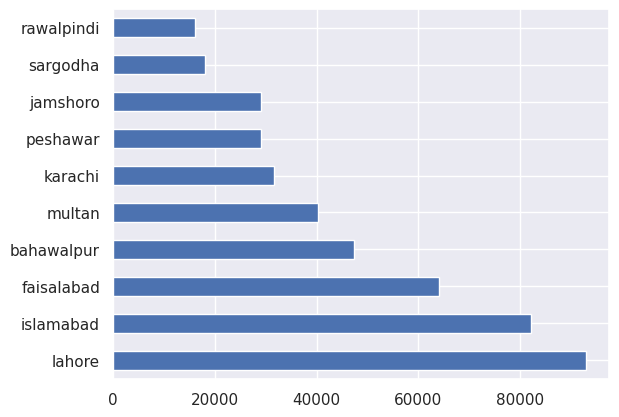

In [ ]:
clone['City'].value_counts()[:10].plot(kind='barh')

<Axes: >

) missing from current font.
  func(*args, **kwargs)
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


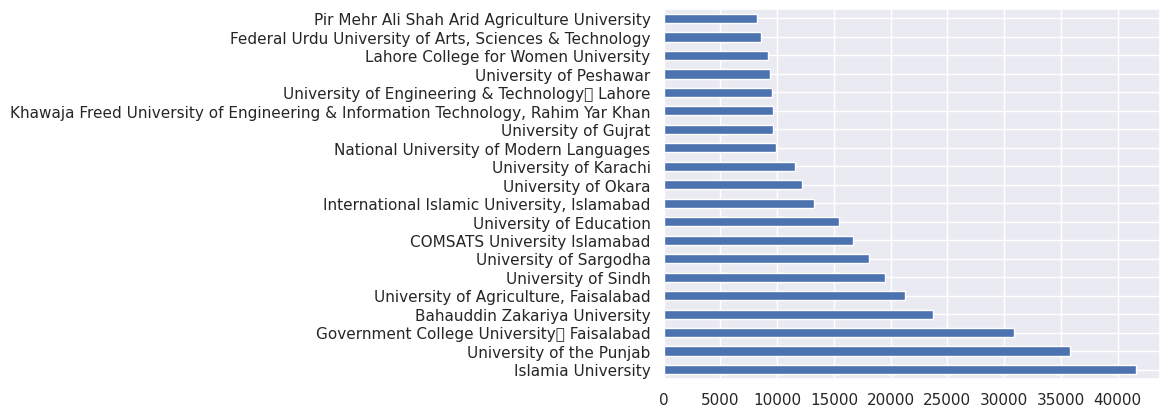

In [ ]:
clone['University'].value_counts()[:20].plot(kind='barh')

<Axes: >

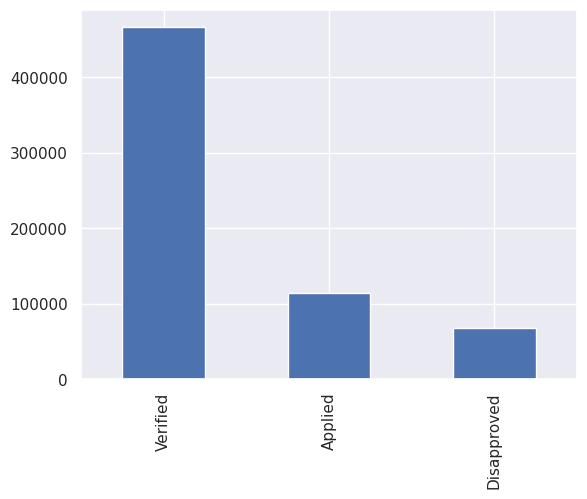

In [ ]:
clone['Status'].value_counts().plot(kind='bar')

<Axes: >

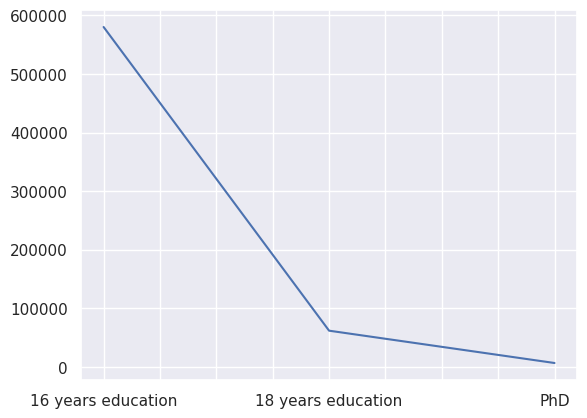

In [ ]:
clone['Degree Level'].value_counts().plot(kind='line')

<Axes: >

) missing from current font.
  func(*args, **kwargs)
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


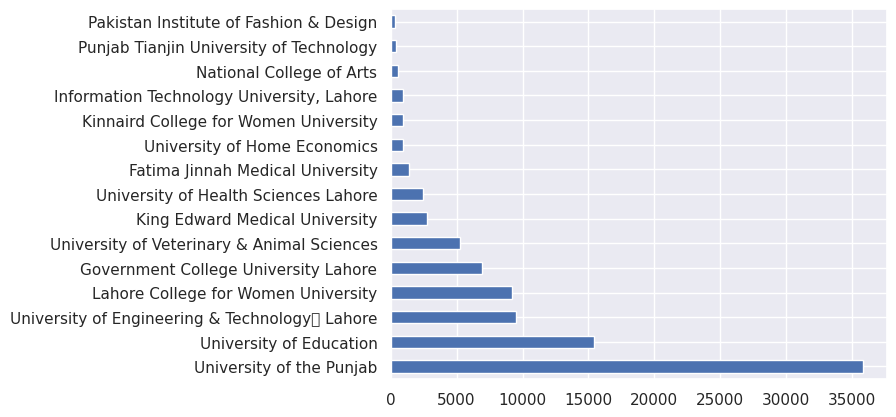

In [ ]:
clone.loc[clone['City'] == 'lahore']['University'].value_counts().plot(kind='barh')

In [ ]:
clone.loc[clone['University'] == 'University of Engineering & Technology\r Lahore']

,Name of Stundent,Father Name,Enrollment No,Degree Program,Year of Study,Semester,Last Exam CGPA,Percentage,Status,Merit Status,City,University,Campus,Degree Name,Degree Level,Years
384152,Attia Mehmood,Qasier Mehmood,2022-AE-14,PhD (5 years),1,2,2.70,65.0,Disapproved,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Architectural Engineering & Design,PhD,1
384153,Aman Ali,Muhammad Asghar Alu,03167439238,PhD (5 years),3,0,2.00,46.0,Disapproved,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Architectural Engineering & Design,PhD,3
384154,Nijah Akram,Muhammad Akram Shahid,2019-PHD-AE-06,PhD (5 years),4,8,4.00,100.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Architectural Engineering & Design,PhD,4
384155,Muhammad Nauman Jawad,Muhammad Jawad,2022-MS-IBD-8,MS/ M.Phil,1,2,4.00,100.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Architectural Engineering & Design,18 years education,1
384156,Muhammad Usman Gill,Muhammad Saleem,2022-MS-IBD-5,MS/ M.Phil,1,2,3.87,97.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Architectural Engineering & Design,18 years education,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393688,Ammar Hashmi,Iftikhar Ali Qureshi,2018-ME-438,BS (Hons),4,8,2.63,63.0,Disapproved,NaN,lahore,University of Engineering & Technology\r Lahore,RCET,Mechanical Engineering,16 years education,4
393689,Sabi Ul Hassan,Muhammad Hayat,2019-ME-441,BS (Hons),4,8,2.56,61.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,RCET,Mechanical Engineering,16 years education,4
393690,Muhammad Bilal,Muhammad Javed Babar,2019-ME-433,BS (Hons),4,7,2.54,61.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,RCET,Mechanical Engineering,16 years education,4
393691,Abdul Wahab Khalid,Muhammad Naseem Khalid,2016ME414,BS (Hons),4,8,2.39,57.0,Disapproved,NaN,lahore,University of Engineering & Technology\r Lahore,RCET,Mechanical Engineering,16 years education,4


In [ ]:
clone.loc[(clone['Father Name'] == 'Muhammad Ayub') & (clone['Year of Study'] == 3) & (clone["Name of Stundent"]=="Muhammad Zeshan Ayub" ) ]

,Name of Stundent,Father Name,Enrollment No,Degree Program,Year of Study,Semester,Last Exam CGPA,Percentage,Status,Merit Status,City,University,Campus,Degree Name,Degree Level,Years
387309,Muhammad Zeshan Ayub,Muhammad Ayub,2020-CS-113,BS (Hons),3,5,3.83,96.0,Verified,NaN,lahore,University of Engineering & Technology\r Lahore,Main campus,Computer Science,16 years education,3


In [ ]:
!pip install pycrypto

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.2/446.2 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp310-cp310-linux_x86_64.whl size=498545 sha256=a812284956dc68ebee7d814f126bd63452a0d8accbcbfe2cedad46476ddf2ee4
  Stored in directory: /root/.cache/pip/wheels/e8/4b/5b/b10a6fc885057b6ff9fbd5691d7e700d0a9408f80b7e6f12e0
Successfully built pycrypto
